In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
np.random.seed(12345)

In [35]:

#rng = np.random.default_rng() # setting a random number seed
# all lengths are in metres
# power is in watts unless converted 

# boundary layer height for region A
height_of_boundary_layer = {
    'A': 2000,
    'B': 700,
    'C': 700
}

num_of_hours_in_year = 8760
rho_air = 1.2 #kg.per.m3
rotor_area = 5027 #m2
eta=.44 # capacity factor 
wind_turbine_capacity = 2000000 * np.ones(8760) #Vestas V-80 2MW turbine 
surface_roughness = .001

volker_park_dimensions = {'small': [5000,5000],
                          'medium': [18500,18500],
                         'large': [170000,170000],
                         'very_large':[338000,338000]}

In [32]:
for num in volker_park_dimensions:
    print type(volker_park_dimensions[num][0])

<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>


In [3]:
A_weibull_k = 3.1
A_weibull_lambda = 8.33 # Region A

B_weibull_k = 2.4
B_weibull_lambda = 10.6 # Region B

C_weibull_k = 3.1
C_weibull_lambda = 14.7 #Region C


In [4]:

A_wind_power_total_annual_yield_MW_100 = np.empty(10000)
A_wind_power_total_annual_yield_MW_1000 = np.empty(10000)
A_wind_power_total_annual_yield_MW_10000 = np.empty(10000)
A_wind_power_total_annual_yield_MW_100000 = np.empty(10000)

for i in np.arange(0,10000):
    A_windspeed =  A_weibull_lambda * np.random.weibull(A_weibull_k , num_of_hours_in_year)
    A_wind_total = .5 * rho_air/2. * (A_windspeed**3) * eta * rotor_area 
    A_wind_power_annual_MW_N_100 = 100 * np.minimum(A_wind_total, wind_turbine_capacity)/(num_of_hours_in_year * 1000000)
    A_wind_power_annual_MW_N_1000 = 1000 * np.minimum(A_wind_total, wind_turbine_capacity)/(num_of_hours_in_year * 1000000)
    A_wind_power_annual_MW_N_10000 = 10000 * np.minimum(A_wind_total, wind_turbine_capacity)/(num_of_hours_in_year * 1000000)
    A_wind_power_annual_MW_N_100000 = 100000 * np.minimum(A_wind_total, wind_turbine_capacity)/(num_of_hours_in_year * 1000000)
    A_wind_power_total_annual_yield_MW_100[i] = A_wind_power_annual_MW_N_100.sum()
    A_wind_power_total_annual_yield_MW_1000[i] = A_wind_power_annual_MW_N_1000.sum()
    A_wind_power_total_annual_yield_MW_10000[i] = A_wind_power_annual_MW_N_10000.sum()
    A_wind_power_total_annual_yield_MW_100000[i] = A_wind_power_annual_MW_N_100000.sum()
    
A_wind_power_total_mean_annual_yield_MW_100 = A_wind_power_total_annual_yield_MW_100.mean()
A_wind_power_total_mean_annual_yield_MW_1000 = A_wind_power_total_annual_yield_MW_1000.mean()    
A_wind_power_total_mean_annual_yield_MW_10000 = A_wind_power_total_annual_yield_MW_10000.mean()    
A_wind_power_total_mean_annual_yield_MW_100000 = A_wind_power_total_annual_yield_MW_100000.mean()

A_wind_power_total_median_annual_yield_MW_100 = np.median(A_wind_power_total_annual_yield_MW_100)
A_wind_power_total_median_annual_yield_MW_1000 = np.median(A_wind_power_total_annual_yield_MW_1000)
A_wind_power_total_median_annual_yield_MW_10000 = np.median(A_wind_power_total_annual_yield_MW_10000)
A_wind_power_total_median_annual_yield_MW_100000 = np.median(A_wind_power_total_annual_yield_MW_100000)

A_wind_power_total_std_annual_yield_MW_100 = np.std(A_wind_power_total_annual_yield_MW_100)
A_wind_power_total_std_annual_yield_MW_1000 = np.std(A_wind_power_total_annual_yield_MW_1000)
A_wind_power_total_std_annual_yield_MW_10000 = np.std(A_wind_power_total_annual_yield_MW_10000)
A_wind_power_total_std_annual_yield_MW_100000 = np.std(A_wind_power_total_annual_yield_MW_100000)


In [5]:
A = pd.DataFrame(columns = ['100','1000','10000','100000','Case'])
A['100'] = A_wind_power_total_annual_yield_MW_100
A['1000'] = A_wind_power_total_annual_yield_MW_1000
A['10000'] = A_wind_power_total_annual_yield_MW_10000
A['100000'] = A_wind_power_total_annual_yield_MW_100000
A['Case'] = 'A'


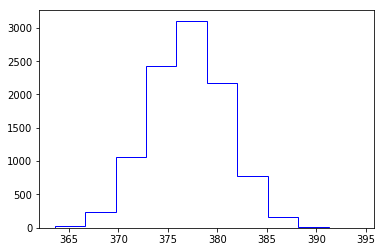

In [21]:
plt.hist(A_wind_power_total_annual_yield_MW_1000, histtype = 'step',color = 'blue')
#plt.xlim(0,30)
plt.show()

In [7]:
B_wind_power_total_annual_yield_MW_100 = np.empty(10000)
B_wind_power_total_annual_yield_MW_1000 = np.empty(10000)
B_wind_power_total_annual_yield_MW_10000 = np.empty(10000)
B_wind_power_total_annual_yield_MW_100000 = np.empty(10000)

for i in np.arange(0,10000):
    B_windspeed =  B_weibull_lambda * np.random.weibull(B_weibull_k , num_of_hours_in_year)
    B_wind_total = .5 * rho_air/2. * (B_windspeed**3) * eta * rotor_area 
    B_wind_power_annual_MW_N_100 = 100 * np.minimum(B_wind_total, wind_turbine_capacity)/(num_of_hours_in_year * 1000000)
    B_wind_power_annual_MW_N_1000 = 1000 * np.minimum(B_wind_total, wind_turbine_capacity)/(num_of_hours_in_year * 1000000)
    B_wind_power_annual_MW_N_10000 = 10000 * np.minimum(B_wind_total, wind_turbine_capacity)/(num_of_hours_in_year * 1000000)
    B_wind_power_annual_MW_N_100000 = 100000 * np.minimum(B_wind_total, wind_turbine_capacity)/(num_of_hours_in_year * 1000000)
    B_wind_power_total_annual_yield_MW_100[i] = B_wind_power_annual_MW_N_100.sum()
    B_wind_power_total_annual_yield_MW_1000[i] = B_wind_power_annual_MW_N_1000.sum()
    B_wind_power_total_annual_yield_MW_10000[i] = B_wind_power_annual_MW_N_10000.sum()
    B_wind_power_total_annual_yield_MW_100000[i] = B_wind_power_annual_MW_N_100000.sum()
    
B_wind_power_total_mean_annual_yield_MW_100 = B_wind_power_total_annual_yield_MW_100.mean()
B_wind_power_total_mean_annual_yield_MW_1000 = B_wind_power_total_annual_yield_MW_1000.mean()    
B_wind_power_total_mean_annual_yield_MW_10000 = B_wind_power_total_annual_yield_MW_10000.mean()    
B_wind_power_total_mean_annual_yield_MW_100000 = B_wind_power_total_annual_yield_MW_100000.mean()

B_wind_power_total_median_annual_yield_MW_100 = np.median(B_wind_power_total_annual_yield_MW_100)
B_wind_power_total_median_annual_yield_MW_1000 = np.median(B_wind_power_total_annual_yield_MW_1000)
B_wind_power_total_median_annual_yield_MW_10000 = np.median(B_wind_power_total_annual_yield_MW_10000)
B_wind_power_total_median_annual_yield_MW_100000 = np.median(B_wind_power_total_annual_yield_MW_100000)

B_wind_power_total_std_annual_yield_MW_100 = np.std(B_wind_power_total_annual_yield_MW_100)
B_wind_power_total_std_annual_yield_MW_1000 = np.std(B_wind_power_total_annual_yield_MW_1000)
B_wind_power_total_std_annual_yield_MW_10000 = np.std(B_wind_power_total_annual_yield_MW_10000)
B_wind_power_total_std_annual_yield_MW_100000 = np.std(B_wind_power_total_annual_yield_MW_100000)

In [8]:
B = pd.DataFrame(columns = ['100','1000','10000','100000','Case'])
B['100'] = B_wind_power_total_annual_yield_MW_100
B['1000'] = B_wind_power_total_annual_yield_MW_1000
B['10000'] = B_wind_power_total_annual_yield_MW_10000
B['100000'] = B_wind_power_total_annual_yield_MW_100000
B['Case'] = 'B'

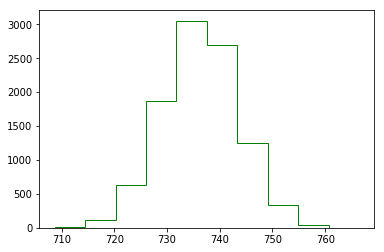

In [20]:
plt.hist(B_wind_power_total_annual_yield_MW_1000, histtype = 'step',color = 'green')
#plt.xlim(0,30)
plt.show()

In [10]:
B_wind_power_total_std_annual_yield_MW_100/B_wind_power_total_mean_annual_yield_MW_100

0.00975807917357806

In [11]:
C_wind_power_total_annual_yield_MW_100 = np.empty(10000)
C_wind_power_total_annual_yield_MW_1000 = np.empty(10000)
C_wind_power_total_annual_yield_MW_10000 = np.empty(10000)
C_wind_power_total_annual_yield_MW_100000 = np.empty(10000)

for i in np.arange(0,10000):
    C_windspeed =  C_weibull_lambda * np.random.weibull(C_weibull_k , num_of_hours_in_year)
    C_wind_total = .5 * rho_air/2. * (C_windspeed**3) * eta * rotor_area 
    C_wind_power_annual_MW_N_100 = 100 * np.minimum(C_wind_total, wind_turbine_capacity)/(num_of_hours_in_year * 1000000)
    C_wind_power_annual_MW_N_1000 = 1000 * np.minimum(C_wind_total, wind_turbine_capacity)/(num_of_hours_in_year * 1000000)
    C_wind_power_annual_MW_N_10000 = 10000 * np.minimum(C_wind_total, wind_turbine_capacity)/(num_of_hours_in_year * 1000000)
    C_wind_power_annual_MW_N_100000 = 100000 * np.minimum(C_wind_total, wind_turbine_capacity)/(num_of_hours_in_year * 1000000)
    C_wind_power_total_annual_yield_MW_100[i] = C_wind_power_annual_MW_N_100.sum()
    C_wind_power_total_annual_yield_MW_1000[i] = C_wind_power_annual_MW_N_1000.sum()
    C_wind_power_total_annual_yield_MW_10000[i] = C_wind_power_annual_MW_N_10000.sum()
    C_wind_power_total_annual_yield_MW_100000[i] = C_wind_power_annual_MW_N_100000.sum()
    
C_wind_power_total_mean_annual_yield_MW_100 = C_wind_power_total_annual_yield_MW_100.mean()
C_wind_power_total_mean_annual_yield_MW_1000 = C_wind_power_total_annual_yield_MW_1000.mean()    
C_wind_power_total_mean_annual_yield_MW_10000 = C_wind_power_total_annual_yield_MW_10000.mean()    
C_wind_power_total_mean_annual_yield_MW_100000 = C_wind_power_total_annual_yield_MW_100000.mean()

C_wind_power_total_median_annual_yield_MW_100 = np.median(C_wind_power_total_annual_yield_MW_100)
C_wind_power_total_median_annual_yield_MW_1000 = np.median(C_wind_power_total_annual_yield_MW_1000)
C_wind_power_total_median_annual_yield_MW_10000 = np.median(C_wind_power_total_annual_yield_MW_10000)
C_wind_power_total_median_annual_yield_MW_100000 = np.median(C_wind_power_total_annual_yield_MW_100000)

C_wind_power_total_std_annual_yield_MW_100 = np.std(C_wind_power_total_annual_yield_MW_100)
C_wind_power_total_std_annual_yield_MW_1000 = np.std(C_wind_power_total_annual_yield_MW_1000)
C_wind_power_total_std_annual_yield_MW_10000 = np.std(C_wind_power_total_annual_yield_MW_10000)
C_wind_power_total_std_annual_yield_MW_100000 = np.std(C_wind_power_total_annual_yield_MW_100000)

In [12]:
C = pd.DataFrame(columns = ['100','1000','10000','100000','Case'])
C['100'] = C_wind_power_total_annual_yield_MW_100
C['1000'] = C_wind_power_total_annual_yield_MW_1000
C['10000'] = C_wind_power_total_annual_yield_MW_10000
C['100000'] = C_wind_power_total_annual_yield_MW_100000
C['Case'] = 'C'

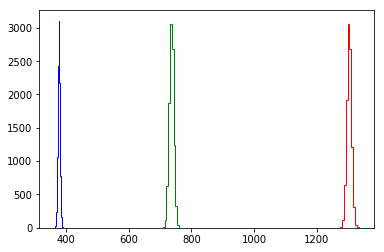

In [22]:
plt.hist(A_wind_power_total_annual_yield_MW_1000, histtype = 'step',color = 'blue')
plt.hist(B_wind_power_total_annual_yield_MW_1000, histtype = 'step',color = 'green')
plt.hist(C_wind_power_total_annual_yield_MW_1000, histtype = 'step',color = 'red')
#plt.xlim(0,30)
plt.show()

In [14]:
frames = [A,B,C]
all_common = pd.concat(frames,sort = False)

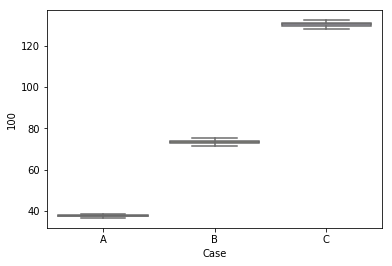

In [15]:
ax = sns.boxplot(x="Case", y= '100',data=all_common, palette="Set3", showfliers = False)

In [16]:
index = ['100','1000','10000','100000']
df_windpower_sensitivity = pd.DataFrame(columns = ['A','B','C'], index = index) # standard deviation of annual power divided by mean of annual power
df_windpower_sensitivity['A']['100'] = A_wind_power_total_std_annual_yield_MW_100/A_wind_power_total_mean_annual_yield_MW_100 *100
df_windpower_sensitivity['A']['1000'] = A_wind_power_total_std_annual_yield_MW_1000/A_wind_power_total_mean_annual_yield_MW_1000 *100
df_windpower_sensitivity['A']['10000'] = A_wind_power_total_std_annual_yield_MW_10000/A_wind_power_total_mean_annual_yield_MW_10000 *100
df_windpower_sensitivity['A']['100000'] = A_wind_power_total_std_annual_yield_MW_100000/A_wind_power_total_mean_annual_yield_MW_100000 *100
df_windpower_sensitivity['B']['100'] = B_wind_power_total_std_annual_yield_MW_100/B_wind_power_total_mean_annual_yield_MW_100 *100
df_windpower_sensitivity['B']['1000'] = B_wind_power_total_std_annual_yield_MW_1000/B_wind_power_total_mean_annual_yield_MW_1000 *100
df_windpower_sensitivity['B']['10000'] = B_wind_power_total_std_annual_yield_MW_10000/B_wind_power_total_mean_annual_yield_MW_10000 *100
df_windpower_sensitivity['B']['100000'] = B_wind_power_total_std_annual_yield_MW_100000/B_wind_power_total_mean_annual_yield_MW_100000 *100
df_windpower_sensitivity['C']['100'] = C_wind_power_total_std_annual_yield_MW_100/C_wind_power_total_mean_annual_yield_MW_100 *100
df_windpower_sensitivity['C']['1000'] = C_wind_power_total_std_annual_yield_MW_1000/C_wind_power_total_mean_annual_yield_MW_1000 *100
df_windpower_sensitivity['C']['10000'] = C_wind_power_total_std_annual_yield_MW_10000/C_wind_power_total_mean_annual_yield_MW_10000 *100
df_windpower_sensitivity['C']['100000'] = C_wind_power_total_std_annual_yield_MW_100000/C_wind_power_total_mean_annual_yield_MW_100000 *100

In [17]:
df_windpower_sensitivity

,A,B,C
100,1.01172,0.975808,0.582808
1000,1.01172,0.975808,0.582808
10000,1.01172,0.975808,0.582808
100000,1.01172,0.975808,0.582808


### KEBA

In [61]:
test = []
def reduction_factor(heights,surface_roughness,eta, rotor_area):
    for heights in height_of_boundary_layer:
        numerator = (height_of_boundary_layer[heights] + 2 * surface_roughness * 338000)
        fred  = numerator/(numerator + 1.5 * ((646416 - 1)/(338000*338000)) * (eta * rotor_area * 338000))
        print(numerator)
        test.append(fred)
    print(test)

In [62]:
reduction_factor(height_of_boundary_layer,surface_roughness,eta, rotor_area)

2676.0
1376.0
1376.0
[1.0, 1.0, 1.0]


In [60]:
for heights in height_of_boundary_layer:
    print height_of_boundary_layer[heights]

2000
700
700


In [63]:
rotor_area

5027

In [64]:
eta

0.44